In [1]:
import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

c:\users\musaho\anaconda3\lib\site-packages\pandas\compat\_optional.py:106: UserWarning: Pandas requires version '1.2.1' or newer of 'bottleneck' (version '1.0.0' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
data = pd.read_json('reviews\Cell_Phones_and_Accessories_5.json', lines=True)

In [3]:
data.head(6)

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,120401325X,"[0, 0]",4,They look good and stick good! I just don't li...,"05 21, 2014",A30TL5EWN6DFXT,christina,Looks Good,1400630400
1,120401325X,"[0, 0]",5,These stickers work like the review says they ...,"01 14, 2014",ASY55RVNIL0UD,emily l.,Really great product.,1389657600
2,120401325X,"[0, 0]",5,These are awesome and make my phone look so st...,"06 26, 2014",A2TMXE2AFO7ONB,Erica,LOVE LOVE LOVE,1403740800
3,120401325X,"[4, 4]",4,Item arrived in great time and was in perfect ...,"10 21, 2013",AWJ0WZQYMYFQ4,JM,Cute!,1382313600
4,120401325X,"[2, 3]",5,"awesome! stays on, and looks great. can be use...","02 3, 2013",ATX7CZYFXI1KW,patrice m rogoza,leopard home button sticker for iphone 4s,1359849600
5,120401325X,"[1, 2]",3,These make using the home button easy. My daug...,"10 12, 2013",APX47D16JOP7H,RLH,Cute,1381536000


In [4]:
data[data.duplicated(subset={'reviewerID', 'reviewerName', 'reviewTime', 'reviewText'})]

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime


In [5]:
data[['helpful_norminator', 'helpful_denorminator']] = pd.DataFrame(data.helpful.to_list())

In [6]:
data.drop(columns='helpful', inplace=True)

In [7]:
data.head(6)

,asin,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,helpful_norminator,helpful_denorminator
0,120401325X,4,They look good and stick good! I just don't li...,"05 21, 2014",A30TL5EWN6DFXT,christina,Looks Good,1400630400,0,0
1,120401325X,5,These stickers work like the review says they ...,"01 14, 2014",ASY55RVNIL0UD,emily l.,Really great product.,1389657600,0,0
2,120401325X,5,These are awesome and make my phone look so st...,"06 26, 2014",A2TMXE2AFO7ONB,Erica,LOVE LOVE LOVE,1403740800,0,0
3,120401325X,4,Item arrived in great time and was in perfect ...,"10 21, 2013",AWJ0WZQYMYFQ4,JM,Cute!,1382313600,4,4
4,120401325X,5,"awesome! stays on, and looks great. can be use...","02 3, 2013",ATX7CZYFXI1KW,patrice m rogoza,leopard home button sticker for iphone 4s,1359849600,2,3
5,120401325X,3,These make using the home button easy. My daug...,"10 12, 2013",APX47D16JOP7H,RLH,Cute,1381536000,1,2


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194439 entries, 0 to 194438
Data columns (total 10 columns):
asin                    194439 non-null object
overall                 194439 non-null int64
reviewText              194439 non-null object
reviewTime              194439 non-null object
reviewerID              194439 non-null object
reviewerName            190920 non-null object
summary                 194439 non-null object
unixReviewTime          194439 non-null int64
helpful_norminator      194439 non-null int64
helpful_denorminator    194439 non-null int64
dtypes: int64(4), object(6)
memory usage: 14.8+ MB


In [9]:
data.overall.value_counts()

5    108664
4     39993
3     21439
1     13279
2     11064
Name: overall, dtype: int64

In [10]:
df = data.copy()
df = df[df.overall!=3]
df.reset_index(inplace=True)

In [11]:
df['overall'] = df['overall'].apply(lambda x : 1 if x >= 4  else 0)

In [12]:
df.head(6)

,index,asin,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,helpful_norminator,helpful_denorminator
0,0,120401325X,1,They look good and stick good! I just don't li...,"05 21, 2014",A30TL5EWN6DFXT,christina,Looks Good,1400630400,0,0
1,1,120401325X,1,These stickers work like the review says they ...,"01 14, 2014",ASY55RVNIL0UD,emily l.,Really great product.,1389657600,0,0
2,2,120401325X,1,These are awesome and make my phone look so st...,"06 26, 2014",A2TMXE2AFO7ONB,Erica,LOVE LOVE LOVE,1403740800,0,0
3,3,120401325X,1,Item arrived in great time and was in perfect ...,"10 21, 2013",AWJ0WZQYMYFQ4,JM,Cute!,1382313600,4,4
4,4,120401325X,1,"awesome! stays on, and looks great. can be use...","02 3, 2013",ATX7CZYFXI1KW,patrice m rogoza,leopard home button sticker for iphone 4s,1359849600,2,3
5,6,120401325X,1,Came just as described.. It doesn't come unstu...,"08 22, 2013",A1JVVYYO7G56DS,Tyler Evans,best thing ever..,1377129600,0,0


In [13]:
df = df[df.reviewerName.isna() != True]
df.reset_index(inplace=True)

In [14]:
df[df.helpful_norminator > df.helpful_denorminator]

,level_0,index,asin,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,helpful_norminator,helpful_denorminator


In [15]:
from datetime import datetime

In [16]:
df['date'] = df['unixReviewTime'].apply(lambda x : datetime.utcfromtimestamp(x).strftime('%m-%d-%Y %H:%M:%S'))

In [17]:
df['date'] = pd.to_datetime(df['date'])

In [18]:
df['weekday'] = df.date.dt.weekday

In [19]:
df.drop(columns=['reviewTime', 'unixReviewTime', 'reviewerName', 'date', 'reviewerID'], axis=1, inplace=True)

In [20]:
df.head(6)

,level_0,index,asin,overall,reviewText,summary,helpful_norminator,helpful_denorminator,weekday
0,0,0,120401325X,1,They look good and stick good! I just don't li...,Looks Good,0,0,2
1,1,1,120401325X,1,These stickers work like the review says they ...,Really great product.,0,0,1
2,2,2,120401325X,1,These are awesome and make my phone look so st...,LOVE LOVE LOVE,0,0,3
3,3,3,120401325X,1,Item arrived in great time and was in perfect ...,Cute!,4,4,0
4,4,4,120401325X,1,"awesome! stays on, and looks great. can be use...",leopard home button sticker for iphone 4s,2,3,6
5,5,6,120401325X,1,Came just as described.. It doesn't come unstu...,best thing ever..,0,0,3


In [21]:
pd.set_option('max_colwidth', 600)

In [22]:
df[['reviewText']].head(6)

,reviewText
0,They look good and stick good! I just don't like the rounded shape because I was always bumping it and Siri kept popping up and it was irritating. I just won't buy a product like this again
1,These stickers work like the review says they do. They stick on great and they stay on the phone. They are super stylish and I can share them with my sister. :)
2,These are awesome and make my phone look so stylish! I have only used one so far and have had it on for almost a year! CAN YOU BELIEVE THAT! ONE YEAR!! Great quality!
3,"Item arrived in great time and was in perfect condition. However, I ordered these buttons because they were a great deal and included a FREE screen protector. I never received one. Though its not a big deal, it would've been nice to get it since they claim it comes with one."
4,"awesome! stays on, and looks great. can be used on multiple apple products. especially having nails, it helps to have an elevated key."
5,Came just as described.. It doesn't come unstuck and its cute! People ask where I got them from & it's great when driving.


In [23]:
import re

In [24]:
def remove_pattern(input_text, pattern):
    r = re.findall(pattern, input_text)
    for i in r:
        sub = re.sub(i, '', input_text)
    return sub

In [25]:
df['reviewText'] = df['reviewText'].str.replace("[^a-zA-Z0-9$]", " ")

In [26]:
df['reviewText'] = df['reviewText'].str.lower()

In [27]:
df[['reviewText']].head(6)

,reviewText
0,they look good and stick good i just don t like the rounded shape because i was always bumping it and siri kept popping up and it was irritating i just won t buy a product like this again
1,these stickers work like the review says they do they stick on great and they stay on the phone they are super stylish and i can share them with my sister
2,these are awesome and make my phone look so stylish i have only used one so far and have had it on for almost a year can you believe that one year great quality
3,item arrived in great time and was in perfect condition however i ordered these buttons because they were a great deal and included a free screen protector i never received one though its not a big deal it would ve been nice to get it since they claim it comes with one
4,awesome stays on and looks great can be used on multiple apple products especially having nails it helps to have an elevated key
5,came just as described it doesn t come unstuck and its cute people ask where i got them from it s great when driving


In [28]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [29]:
# stop_words = set(stopwords.words('english'))

In [30]:
# df['tidy_reviewText'] = df['reviewText'].apply(lambda x: ' '.join(w for w in x.split() if w not in stop_words))

In [31]:
df['tidy_reviewText'] = df['reviewText']

In [32]:
tokenized_reviews = df.tidy_reviewText.apply(lambda x: x.split())
stemmer = PorterStemmer()
tokenized_reviews = tokenized_reviews.apply(lambda x: [stemmer.stem(i) for i in x])
tokenized_reviews.head()

0                                                                                                   [they, look, good, and, stick, good, i, just, don, t, like, the, round, shape, becaus, i, wa, alway, bump, it, and, siri, kept, pop, up, and, it, wa, irrit, i, just, won, t, buy, a, product, like, thi, again]
1                                                                                                                           [these, sticker, work, like, the, review, say, they, do, they, stick, on, great, and, they, stay, on, the, phone, they, are, super, stylish, and, i, can, share, them, with, my, sister]
2                                                                                                                   [these, are, awesom, and, make, my, phone, look, so, stylish, i, have, onli, use, one, so, far, and, have, had, it, on, for, almost, a, year, can, you, believ, that, one, year, great, qualiti]
3    [item, arriv, in, great, time, and, wa, in, perfect, condit, howev, 

In [33]:
df[['tidy_reviewText']].tail(6)

,tidy_reviewText
169839,i don t like the word hate so let s just say that there are two things that i can t stand 1 i can t stand paying full price for an apple lightning cable 2 i can t stand getting the message that this cable is not compatible with your device message this cable is fantastic it is short which i like i don t need more than a couple of feet of cable coiled up on my desk it charges well and doesn t give me the error hooray i like the black color of the cable and i like the nice substantial pvc coating this cable feels very sturdy and i m confident that it won t fall apart li...
169840,works great just like my original one i really need extras of these for the car and house so love this and the price
169841,great product great packaging high quality and apple certified works greats this was a good replacement for my apple cable that is falling apart i highly recommend this cable
169842,this is a great cable just as good as the more expensive apple one my husband and my daughter both lost their original cables for their iphones and they went the cheap route buying a cheap replacement cable i believe it messed up their battery memory because coincidentally both of them have battery hold charge issues but my son and i do not i used this cable to charge my husbands phone and it charged it from 3 to 100 in about an hour that s about how long it takes my phone to charge but with the cheap cable his takes 2 1 2 hours i m thrilled with the quality of this cable i m hop...
169843,i really like it becasue it works well with my life proof case i do not have to remove the case to charge my phone
169844,product as described i have wasted a lot of money on cords i would buy them usually on road trips and then go to plug my phone in just to discover i have to work with cord and leave my phone sit while it was charging this cord has not given me any issues works just like my original


In [34]:
for i in range(len(tokenized_reviews)):
    tokenized_reviews[i] = ' '.join(tokenized_reviews[i])
df['tidy_reviewText'] = tokenized_reviews

In [35]:
from wordcloud import WordCloud

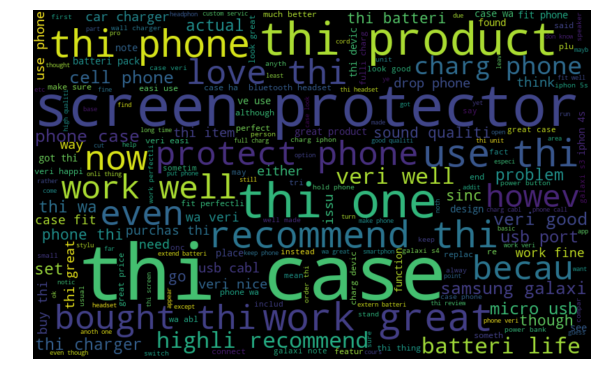

In [36]:
allwords = ' '.join([text for text in df.tidy_reviewText])
wordcloud = WordCloud(width=800, height=500, max_font_size=110).generate(allwords)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

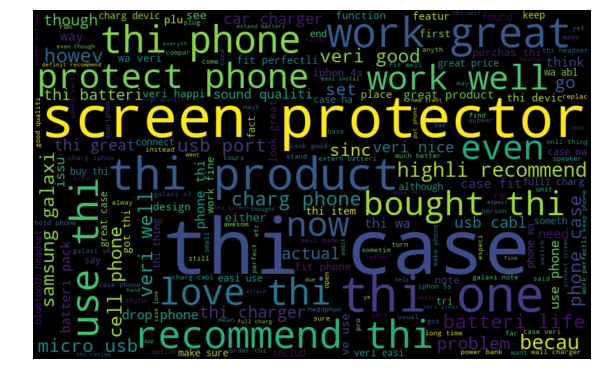

In [37]:
allwords = ' '.join([text for text in df.tidy_reviewText[df.overall==1]])
wordcloud = WordCloud(width=800, height=500, max_font_size=110).generate(allwords)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

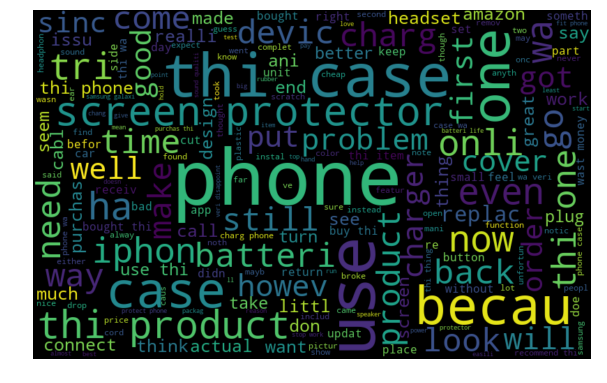

In [38]:
allwords = ' '.join([text for text in df.tidy_reviewText[df.overall==0]])
wordcloud = WordCloud(width=800, height=500, max_font_size=110).generate(allwords)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [39]:
df['summary'] = df['summary'].str.replace("[^a-zA-Z0-9$]", " ")
df['summary'] = df['summary'].str.lower()

tokenized_summary = df.summary.apply(lambda x: x.split())
tokenized_summary = tokenized_summary.apply(lambda x: [stemmer.stem(i) for i in x])

for i in range(len(tokenized_summary)):
    tokenized_summary[i] = ' '.join(tokenized_summary[i])
df['tidy_summary'] = tokenized_reviews

In [40]:
df[['tidy_summary']]

,tidy_summary
0,they look good and stick good i just don t like the round shape becaus i wa alway bump it and siri kept pop up and it wa irrit i just won t buy a product like thi again
1,these sticker work like the review say they do they stick on great and they stay on the phone they are super stylish and i can share them with my sister
2,these are awesom and make my phone look so stylish i have onli use one so far and have had it on for almost a year can you believ that one year great qualiti
3,item arriv in great time and wa in perfect condit howev i order these button becaus they were a great deal and includ a free screen protector i never receiv one though it not a big deal it would ve been nice to get it sinc they claim it come with one
4,awesom stay on and look great can be use on multipl appl product especi have nail it help to have an elev key
...,...
169840,work great just like my origin one i realli need extra of these for the car and hous so love thi and the price
169841,great product great packag high qualiti and appl certifi work great thi wa a good replac for my appl cabl that is fall apart i highli recommend thi cabl
169842,thi is a great cabl just as good as the more expens appl one my husband and my daughter both lost their origin cabl for their iphon and they went the cheap rout buy a cheap replac cabl i believ it mess up their batteri memori becaus coincident both of them have batteri hold charg issu but my son and i do not i use thi cabl to charg my husband phone and it charg it from 3 to 100 in about an hour that s about how long it take my phone to charg but with the cheap cabl hi take 2 1 2 hour i m thrill with the qualiti of thi cabl i m hope now that we have 34 qualiti 34 cabl again mayb the batteri...
169843,i realli like it becasu it work well with my life proof case i do not have to remov the case to charg my phone


In [41]:
df.drop(columns=['level_0', 'index'], inplace=True)

In [42]:
df['ratio_helpful'] = df.helpful_norminator/df.helpful_denorminator

c:\users\musaho\anaconda3\lib\site-packages\pandas\compat\_optional.py:106: UserWarning: Pandas requires version '2.6.2' or newer of 'numexpr' (version '2.5' currently installed).
  warnings.warn(msg, UserWarning)


In [43]:
df.ratio_helpful = df.ratio_helpful.fillna(0)

In [44]:
# df.ratio_helpful = df.ratio_helpful.astype(int)

In [45]:
df.drop(columns=['helpful_norminator', 'helpful_denorminator', 'reviewText', 'summary'], inplace=True)

In [46]:
df.head()

,asin,overall,weekday,tidy_reviewText,tidy_summary,ratio_helpful
0,120401325X,1,2,they look good and stick good i just don t like the round shape becaus i wa alway bump it and siri kept pop up and it wa irrit i just won t buy a product like thi again,they look good and stick good i just don t like the round shape becaus i wa alway bump it and siri kept pop up and it wa irrit i just won t buy a product like thi again,0.000000
1,120401325X,1,1,these sticker work like the review say they do they stick on great and they stay on the phone they are super stylish and i can share them with my sister,these sticker work like the review say they do they stick on great and they stay on the phone they are super stylish and i can share them with my sister,0.000000
2,120401325X,1,3,these are awesom and make my phone look so stylish i have onli use one so far and have had it on for almost a year can you believ that one year great qualiti,these are awesom and make my phone look so stylish i have onli use one so far and have had it on for almost a year can you believ that one year great qualiti,0.000000
3,120401325X,1,0,item arriv in great time and wa in perfect condit howev i order these button becaus they were a great deal and includ a free screen protector i never receiv one though it not a big deal it would ve been nice to get it sinc they claim it come with one,item arriv in great time and wa in perfect condit howev i order these button becaus they were a great deal and includ a free screen protector i never receiv one though it not a big deal it would ve been nice to get it sinc they claim it come with one,1.000000
4,120401325X,1,6,awesom stay on and look great can be use on multipl appl product especi have nail it help to have an elev key,awesom stay on and look great can be use on multipl appl product especi have nail it help to have an elev key,0.666667


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169845 entries, 0 to 169844
Data columns (total 6 columns):
asin               169845 non-null object
overall            169845 non-null int64
weekday            169845 non-null int64
tidy_reviewText    169845 non-null object
tidy_summary       169845 non-null object
ratio_helpful      169845 non-null float64
dtypes: float64(1), int64(2), object(3)
memory usage: 7.8+ MB


In [48]:
import gensim

In [49]:
tokenized_reviews = df.tidy_reviewText.apply(lambda x : x.split())
model_w2v = gensim.models.Word2Vec(tokenized_reviews, size=100, window=5, min_count=2, sg=1, hs=0, negative=10)
model_w2v.train(tokenized_reviews, total_examples=len(df.tidy_reviewText), epochs=20)

(227200267, 321285380)

In [50]:
model_w2v.wv.most_similar(positive='charger')

[('charg', 0.675950288772583),
 ('wall', 0.6652876734733582),
 ('usb', 0.6508804559707642),
 ('outlet', 0.6466331481933594),
 ('wart', 0.6383309364318848),
 ('powerflow', 0.6303894519805908),
 ('chargerthi', 0.6295790672302246),
 ('adapt', 0.6287229657173157),
 ('powergen', 0.6186464428901672),
 ('unit', 0.6168627738952637)]

In [51]:
model_w2v['charger'] , len(model_w2v['charger'])

c:\users\musaho\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


(array([ 0.1431561 , -0.04570906, -0.32567438,  0.09015482, -0.34562716,
         0.6578247 ,  0.3014628 , -0.29107633,  0.29918754,  0.1204721 ,
        -0.00550111, -0.470747  ,  0.00603365,  0.06534633, -0.29933655,
        -0.53615004, -0.18815935,  0.05586421,  0.23090301, -0.14127664,
        -0.36235335, -0.14036596,  0.14235419,  0.22860476, -0.16361721,
        -0.10549495, -0.3328301 ,  0.55945814, -0.18325439, -0.19686909,
        -0.07336751,  0.43092164, -0.34495276, -0.4783739 , -0.5672344 ,
         0.22842033, -0.1951183 ,  0.13714255,  0.13192779, -0.26208088,
        -0.04684632,  0.41152164,  0.08843527, -0.19815734,  0.31529227,
        -0.23811497,  0.2339743 ,  0.15676615,  0.2154665 ,  0.09847519,
         0.08158213,  0.24515715,  0.40253368,  0.39486778, -0.12734462,
         0.04402978,  0.1630932 ,  0.18763055, -0.253733  ,  0.0518102 ,
        -0.02001127, -0.04143768,  0.29436046, -0.14812925,  0.19575386,
        -0.16046321, -0.10456418,  0.44216767,  0.0

In [52]:
def word_vector(tokens, size):
    vec = np.zeros(size).reshape(1, size)
    count = 0.
    for word in tokens:
        try:
            vec += model_w2v[word].reshape(1, size)
            count+=1
        except KeyError:
            pass
    if count != 0:
        vec/=count
    return vec

In [53]:
wordvec_arrays = np.zeros((len(tokenized_reviews), 100))
for i in range(len(tokenized_reviews)):
    wordvec_arrays[i, : ] = word_vector(tokenized_reviews[i], 100)
wordvec_df = pd.DataFrame(wordvec_arrays)

c:\users\musaho\anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [54]:
tokenized_summary = df.tidy_summary.apply(lambda x : x.split())
wordvec_arrays2 = np.zeros((len(tokenized_summary), 100))
for i in range(len(tokenized_summary)):
    wordvec_arrays2[i, : ] = word_vector(tokenized_summary[i], 100)
wordvec_df2 = pd.DataFrame(wordvec_arrays, columns=range(100,200))

c:\users\musaho\anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [55]:
# wordvec_df2 = pd.DataFrame(wordvec_arrays, columns=range(200,400))

In [56]:
wordvec_df2.head()

,100,101,102,103,104,105,106,107,108,109,...,190,191,192,193,194,195,196,197,198,199
0,-0.073354,-0.138001,-0.124526,0.000297,-0.181005,0.026633,0.056796,-0.078305,0.141702,-0.166627,...,0.053892,0.018356,0.004858,-0.069371,-0.074688,0.059183,-0.253250,-0.080781,-0.271133,0.089248
1,-0.090278,-0.150440,-0.150700,0.057022,-0.168417,-0.078256,-0.002304,-0.094365,0.137285,-0.150666,...,0.050062,-0.000905,0.008079,-0.044677,-0.012312,0.104165,-0.229712,-0.080018,-0.141693,0.056334
2,-0.031079,-0.094634,-0.168251,-0.009952,-0.162874,-0.052037,0.130805,-0.119260,0.159666,-0.090863,...,0.003836,0.071889,-0.030806,-0.044649,-0.035625,0.122915,-0.169075,-0.057378,-0.165787,0.050530
3,-0.094820,-0.099753,-0.146249,0.009032,-0.222092,-0.004905,0.072651,-0.052686,0.215875,-0.085399,...,0.009216,0.029062,0.044395,-0.073967,-0.005612,0.069542,-0.228468,-0.033273,-0.199620,0.118585
4,-0.134840,-0.087157,-0.238783,0.105976,-0.186198,0.055868,0.001855,-0.108987,0.138605,-0.044258,...,0.013837,0.091186,0.053727,-0.075160,-0.048109,0.182263,-0.247225,-0.136668,-0.161028,0.104803


In [57]:
wordvec_concat_df = pd.concat([wordvec_df, wordvec_df2], axis=1)

In [58]:
df.head()

,asin,overall,weekday,tidy_reviewText,tidy_summary,ratio_helpful
0,120401325X,1,2,they look good and stick good i just don t like the round shape becaus i wa alway bump it and siri kept pop up and it wa irrit i just won t buy a product like thi again,they look good and stick good i just don t like the round shape becaus i wa alway bump it and siri kept pop up and it wa irrit i just won t buy a product like thi again,0.000000
1,120401325X,1,1,these sticker work like the review say they do they stick on great and they stay on the phone they are super stylish and i can share them with my sister,these sticker work like the review say they do they stick on great and they stay on the phone they are super stylish and i can share them with my sister,0.000000
2,120401325X,1,3,these are awesom and make my phone look so stylish i have onli use one so far and have had it on for almost a year can you believ that one year great qualiti,these are awesom and make my phone look so stylish i have onli use one so far and have had it on for almost a year can you believ that one year great qualiti,0.000000
3,120401325X,1,0,item arriv in great time and wa in perfect condit howev i order these button becaus they were a great deal and includ a free screen protector i never receiv one though it not a big deal it would ve been nice to get it sinc they claim it come with one,item arriv in great time and wa in perfect condit howev i order these button becaus they were a great deal and includ a free screen protector i never receiv one though it not a big deal it would ve been nice to get it sinc they claim it come with one,1.000000
4,120401325X,1,6,awesom stay on and look great can be use on multipl appl product especi have nail it help to have an elev key,awesom stay on and look great can be use on multipl appl product especi have nail it help to have an elev key,0.666667


In [59]:
df[['asin', 'overall', 'weekday', 'ratio_helpful']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169845 entries, 0 to 169844
Data columns (total 4 columns):
asin             169845 non-null object
overall          169845 non-null int64
weekday          169845 non-null int64
ratio_helpful    169845 non-null float64
dtypes: float64(1), int64(2), object(1)
memory usage: 5.2+ MB


In [60]:
df2 = df[['overall', 'weekday', 'ratio_helpful']]

In [61]:
df = pd.concat([df2, wordvec_df, wordvec_df2], axis=1)

In [62]:
train_w2v = df.iloc[:109000,:]
test_w2v = df.iloc[109000:,:]

In [63]:
import xgboost as xgb

In [64]:
import catboost as cat

In [65]:
params = {
    'objective':'binary:logistic',
    'max_depth':6,
    'min_child_weight': 1,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 1
}

In [66]:
from sklearn.model_selection import train_test_split
xtrain_w2v, xvalid_w2v, y_train, y_valid = train_test_split(train_w2v.drop('overall', axis=1), 
                                                            train_w2v['overall'], test_size=0.35)

In [67]:
dtrain = xgb.DMatrix(xtrain_w2v, label=y_train)
dvalid = xgb.DMatrix(xvalid_w2v, label=y_valid)
dtest = xgb.DMatrix(test_w2v.drop(columns='overall'))

c:\users\musaho\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


In [68]:
from sklearn.metrics import f1_score

In [69]:
def custom_eval(preds, labels):
    labels = labels.get_label().astype(int)
    preds = (preds >= 0.4).astype(int)
    return [('f1_score', f1_score(labels,preds))]

In [70]:
gridsearch_params = [
    (max_depth, min_child_weight)
    for max_depth in range(6,10)
    for min_child_weight in range(6,8)
]
max_f1 = 0.
best_params = None
for max_depth, min_child_weight in gridsearch_params:
    print('CV with max_depth={}, min_child_weight={}'.format(max_depth, min_child_weight))
    params['max_depth'] = max_depth
    params['min_child_weight'] = min_child_weight
    cv_results = xgb.cv(params, dtrain, feval=custom_eval, early_stopping_rounds=5,
                        num_boost_round=100, nfold=3, maximize=True)
    mean_f1 = cv_results['test-f1_score-mean'].mean()
    boost_rounds = cv_results['test-f1_score-mean'].argmax()
    print('F1 score={}, boost rounds={}\n'.format(mean_f1, boost_rounds))
    if mean_f1>max_f1:
        max_f1=mean_f1
        best_params = (max_depth, min_child_weight)
print('Best Params.. max_depth={}, min_child_weight={}, f1_score={}'.format(best_params[0], best_params[1], max_f1))

CV with max_depth=6, min_child_weight=6


c:\users\musaho\anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  from ipykernel import kernelapp as app


F1 score=0.9336565947712419, boost rounds=50

CV with max_depth=6, min_child_weight=7
F1 score=0.9350079154228856, boost rounds=66

CV with max_depth=7, min_child_weight=6
F1 score=0.9360982727272726, boost rounds=76

CV with max_depth=7, min_child_weight=7
F1 score=0.9362990999999999, boost rounds=79

CV with max_depth=8, min_child_weight=6
F1 score=0.9361993526570049, boost rounds=68

CV with max_depth=8, min_child_weight=7
F1 score=0.9352394043715847, boost rounds=60

CV with max_depth=9, min_child_weight=6
F1 score=0.9366709771689498, boost rounds=72

CV with max_depth=9, min_child_weight=7
F1 score=0.9364821851851853, boost rounds=71

Best Params.. max_depth=9, min_child_weight=6, f1_score=0.9366709771689498


In [71]:
params['max_depth'] = best_params[0]
params['min_child_weight'] = best_params[1]

In [72]:
gridsearch_params = [
    (subsample, colsample)
    for subsample in [i/10. for i in range(5,10)]
    for colsample in [i/10. for i in range(5,10)]
]
max_f1 = 0.
best_params = None
for subsample, colsample in gridsearch_params:
    print('CV with subsample={}, colsample={}'.format(subsample, colsample))
    params['subsample'] = subsample
    params['colsample'] = colsample
    cv_results = xgb.cv(params, dtrain, feval=custom_eval, early_stopping_rounds=5,
                        num_boost_round=100, nfold=3, maximize=True)
    mean_f1 = cv_results['test-f1_score-mean'].mean()
    boost_rounds = cv_results['test-f1_score-mean'].argmax()
    print('F1 score={}, boost rounds={}\n'.format(mean_f1, boost_rounds))
    if mean_f1>max_f1:
        max_f1=mean_f1
        best_params = (subsample, colsample)
print('Best Params.. subsample={}, colsample={}, f1_score={}'.format(best_params[0], best_params[1], max_f1))

CV with subsample=0.5, colsample=0.5


c:\users\musaho\anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  from ipykernel import kernelapp as app


F1 score=0.934279074074074, boost rounds=53

CV with subsample=0.5, colsample=0.6
F1 score=0.934279074074074, boost rounds=53

CV with subsample=0.5, colsample=0.7
F1 score=0.934279074074074, boost rounds=53

CV with subsample=0.5, colsample=0.8
F1 score=0.934279074074074, boost rounds=53

CV with subsample=0.5, colsample=0.9
F1 score=0.934279074074074, boost rounds=53

CV with subsample=0.6, colsample=0.5
F1 score=0.9328197685185184, boost rounds=35

CV with subsample=0.6, colsample=0.6
F1 score=0.9328197685185184, boost rounds=35

CV with subsample=0.6, colsample=0.7
F1 score=0.9328197685185184, boost rounds=35

CV with subsample=0.6, colsample=0.8
F1 score=0.9328197685185184, boost rounds=35

CV with subsample=0.6, colsample=0.9
F1 score=0.9328197685185184, boost rounds=35

CV with subsample=0.7, colsample=0.5
F1 score=0.934786680272109, boost rounds=48

CV with subsample=0.7, colsample=0.6
F1 score=0.934786680272109, boost rounds=48

CV with subsample=0.7, colsample=0.7
F1 score=0.

In [73]:
params['subsample'] = best_params[0]
params['colsample'] = best_params[1]

In [74]:
max_f1 = 0.
best_params = None

for eta in [.3, .2, .1, .05, .01, .005]:
    print("CV with eta = {}".format(eta))
    params['eta'] = eta
    cv_results = xgb.cv(params, dtrain, feval= custom_eval, num_boost_round=100, maximize=True, nfold=3, 
                    early_stopping_rounds=5)
    mean_f1 = cv_results['test-f1_score-mean'].mean()
    boost_rounds = cv_results['test-f1_score-mean'].argmax()
    print("F1 Score {} for {} rounds\n".format(mean_f1, boost_rounds))
    if mean_f1 > max_f1:
        max_f1 = mean_f1
        best_params = eta
print("Best params: {}, F1 Score: {}".format(best_params, max_f1))

CV with eta = 0.3


c:\users\musaho\anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  # Remove the CWD from sys.path while we load stuff.


F1 Score 0.9376891300000001 for 98 rounds

CV with eta = 0.2
F1 Score 0.9364049200000001 for 98 rounds

CV with eta = 0.1
F1 Score 0.9344350699999998 for 97 rounds

CV with eta = 0.05
F1 Score 0.9304908666666667 for 98 rounds

CV with eta = 0.01
F1 Score 0.9154793333333333 for 0 rounds

CV with eta = 0.005
F1 Score 0.9154793333333333 for 0 rounds

Best params: 0.3, F1 Score: 0.9376891300000001


In [75]:
params['eta'] = best_params

In [76]:
params

{'colsample': 0.5,
 'colsample_bytree': 1,
 'eta': 0.3,
 'max_depth': 9,
 'min_child_weight': 6,
 'objective': 'binary:logistic',
 'subsample': 0.9}

In [77]:
xgb_model = xgb.train(
    params,
    dtrain,
    feval= custom_eval,
    num_boost_round= 1000,
    maximize=True,
    evals=[(dvalid, "Validation")],
    early_stopping_rounds=10
 )

[0]	Validation-error:0.140577	Validation-f1_score:0.920749
Multiple eval metrics have been passed: 'Validation-f1_score' will be used for early stopping.

Will train until Validation-f1_score hasn't improved in 10 rounds.
[1]	Validation-error:0.131691	Validation-f1_score:0.924111
[2]	Validation-error:0.127313	Validation-f1_score:0.926231
[3]	Validation-error:0.124771	Validation-f1_score:0.927779
[4]	Validation-error:0.122464	Validation-f1_score:0.928616
[5]	Validation-error:0.121966	Validation-f1_score:0.929415
[6]	Validation-error:0.120236	Validation-f1_score:0.929903
[7]	Validation-error:0.119056	Validation-f1_score:0.93065
[8]	Validation-error:0.118218	Validation-f1_score:0.93127
[9]	Validation-error:0.118165	Validation-f1_score:0.931939
[10]	Validation-error:0.116986	Validation-f1_score:0.932593
[11]	Validation-error:0.115125	Validation-f1_score:0.932926
[12]	Validation-error:0.115256	Validation-f1_score:0.933473
[13]	Validation-error:0.115596	Validation-f1_score:0.933674
[14]	Vali

In [104]:
from sklearn.metrics import classification_report, roc_curve, confusion_matrix, accuracy_score, auc

In [79]:
preds = xgb_model.predict(dvalid)

In [80]:
preds = (preds >= .5).astype(int)

In [81]:
preds

array([1, 0, 1, ..., 1, 1, 1])

In [82]:
print(classification_report(y_valid, preds))

              precision    recall  f1-score   support

           0       0.75      0.51      0.60      6024
           1       0.91      0.97      0.94     32126

    accuracy                           0.90     38150
   macro avg       0.83      0.74      0.77     38150
weighted avg       0.89      0.90      0.89     38150



In [88]:
y_valid.value_counts()

1    32126
0     6024
Name: overall, dtype: int64

In [83]:
confusion_matrix(y_valid, preds)

array([[ 3061,  2963],
       [ 1040, 31086]], dtype=int64)

In [84]:
# roc_curve

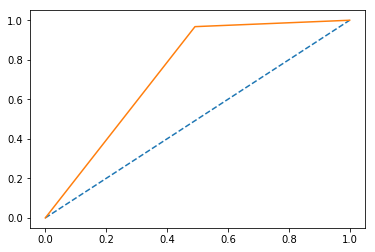

In [105]:
fpr, tpr, _ = roc_curve(y_valid, preds)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr)

In [86]:
import pickle

In [87]:
pickle.dump(xgb_model, open('sentimentModel.pickle', 'wb'))

In [108]:
pred_test = xgb_model.predict(dtest)

In [109]:
pred_test = (pred_test >= .5).astype(int)

In [110]:
print(classification_report(test_w2v.overall, pred_test))

              precision    recall  f1-score   support

           0       0.70      0.48      0.57      6900
           1       0.94      0.97      0.95     53945

    accuracy                           0.92     60845
   macro avg       0.82      0.73      0.76     60845
weighted avg       0.91      0.92      0.91     60845



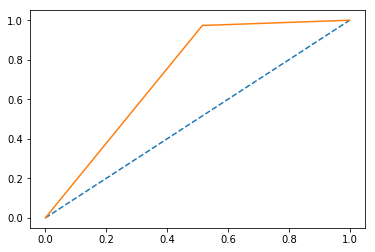

In [111]:
fpr, tpr, _ = roc_curve(test_w2v.overall, pred_test)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr)

In [101]:
auc(fpr, tpr)

0.7287022813090628